In [23]:
import numpy as np
import pandas as pd
from datetime import datetime
import pmdarima as pm
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA

In [2]:
def date_parser(date_str):
    return datetime.strptime(f"190{date_str}", "%Y-%m")

In [3]:
df = pd.read_csv('./shampoo.csv', index_col="Month", parse_dates=["Month"], date_parser=date_parser)

In [4]:
df

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


In [5]:
#df.plot()
#pyplot.show()

In [32]:
train = df.iloc[:int(len(df)*0.67)]
test = df.iloc[int(len(df)*0.67):]
history = list(train.values)
preds = []
for obs in test.values:
    model = ARIMA(history, order=(5,1,0))
    fitted = model.fit()
    pred = fitted.forecast()[0]
    preds.append(pred)
    history.append(obs)

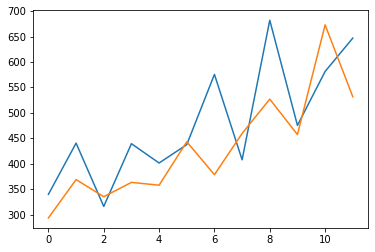

In [22]:
pyplot.plot(test.values)
pyplot.plot(preds)
pyplot.show()